I've been bored with my Rider-Waite tarot deck. Let's try some neural style transfer options to refresh the deck a bit. I used Nicholas Renotte's [tutorial](https://www.youtube.com/watch?v=bFeltWvzZpQ) to get started.

## Model Background

The model for neural style transfer used here was first presented in the paper ["Exploring the structure of a real-time, arbitrary neural artistic stylization network"](https://arxiv.org/pdf/1705.06830.pdf) authored by a team at Google. Previous attempts at style transfer were either not scalable or ran into trouble generalizing to new painting styles. This model, which was trained on 80,000 paintings and 6,000 different textures, can efficiently adapt to unseen styles. 

Inputs are a content image *c* (the image to be stylized) and a style image *s* which represents the style to be emulated. First, a style prediction network *P* is generated. This prediction network creates a set of normalization constants which make up the style transfer network *T*. The content image *c* is run through the style transfer network *T* which results in the stylized image *T*.  

[image here]

The model assumes that images are similar in **content** if they high-level features are close in Euclidian distance, and that they are similar in **style** if their low-level features share the same spatial statistics. Accordingly, the optimization function for style transfer seeks to minimize the sum of content loss and (weighted) style loss. 

## Testing the model on an image

First, we import dependencies.

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

Then, we grab the model from Tensorflow hub. Get it [here](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2). 

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

### Step 2: Preprocess images

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [7]:
content_image = load_image('Portrait.png')
style_image = load_image('PKSenecio.jpg')

### Step 3: Test inputs 

In [8]:
content_image.shape

TensorShape([1, 461, 588, 3])

Testing the style image: first, starting with something more legible; Paul Klee's own self portrait. 

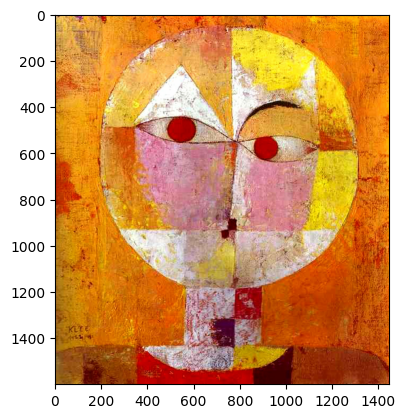

In [9]:
plt.imshow(np.squeeze(style_image))
plt.show()

...and here's my own, much tamer portrait:

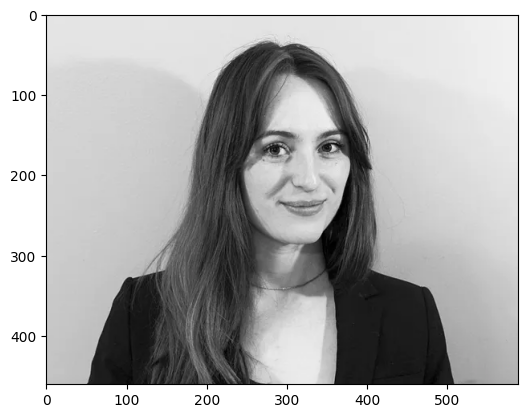

In [10]:
plt.imshow(np.squeeze(content_image))
plt.show()

### Step 4: Stylize images 

In [11]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

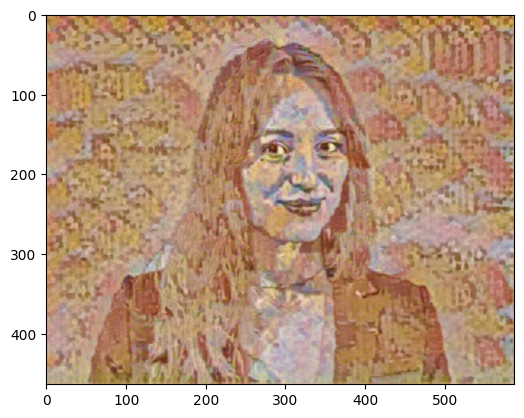

In [12]:
plt.imshow(np.squeeze(stylized_image))
plt.show()